#  <center> Importing packages & loading data

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("auto-mpg.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


`df.horsepower = pd.to_numeric(df.horsepower)`
<br> from the message, "?" symbol must be imputed or deleted.

# <center> cleaning & visualization:

<center>Horsepower column needs to be numeric but 
`?` needs to be dropped or imputed.<br><br>

In [237]:
df = df[~(df.horsepower == '?')].reset_index(drop=True)
df.horsepower = pd.to_numeric(df.horsepower)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


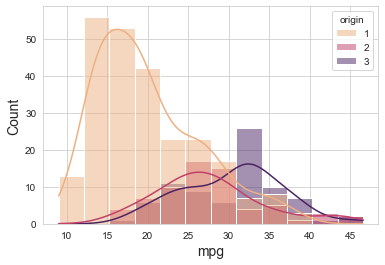

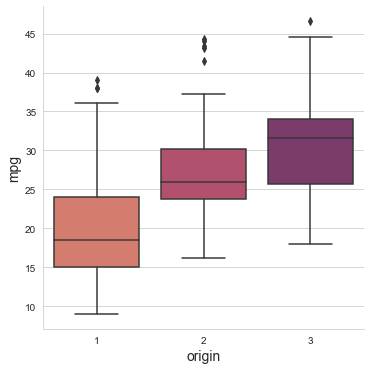

In [238]:
sns.set_style("whitegrid")
sns.set_palette("hls")
sns.set_context( rc={"axes.labelsize":14})


sns.histplot(data=df, x="mpg",kde=True,hue="origin",palette = "flare",alpha=0.5)
sns.catplot(x="origin",data=df,y="mpg",kind="box",palette="flare")

plt.show()

In [239]:
#imputing the outlier

df.loc[(df["origin"] == 1) & (df["mpg"] > 36) , "mpg"] =17  # median
df.loc[(df["origin"] == 2) & (df["mpg"] > 40) , "mpg"] =26  # median
df.loc[(df["origin"] == 3) & (df["mpg"] > 45) , "mpg"] =32  # median


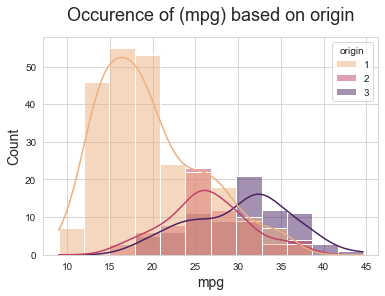

In [240]:
g= sns.histplot(data=df, x="mpg",kde=True,hue="origin",palette = "flare",alpha=0.5)
#print(type(g))
g.set_title("Occurence of (mpg) based on origin",size = 18,y=1.05)
plt.show()

# <center>**1st** Insight:
<center> <u>(on average)</u> ,  mpg for origin 1 is >  mpg for origin 2 > mpg for origin 3 <br><br>

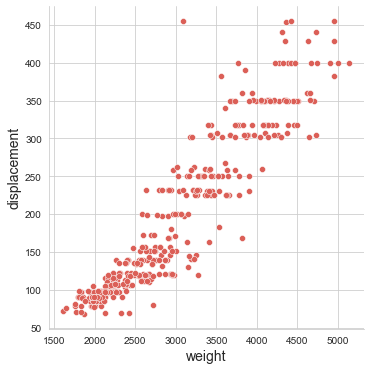

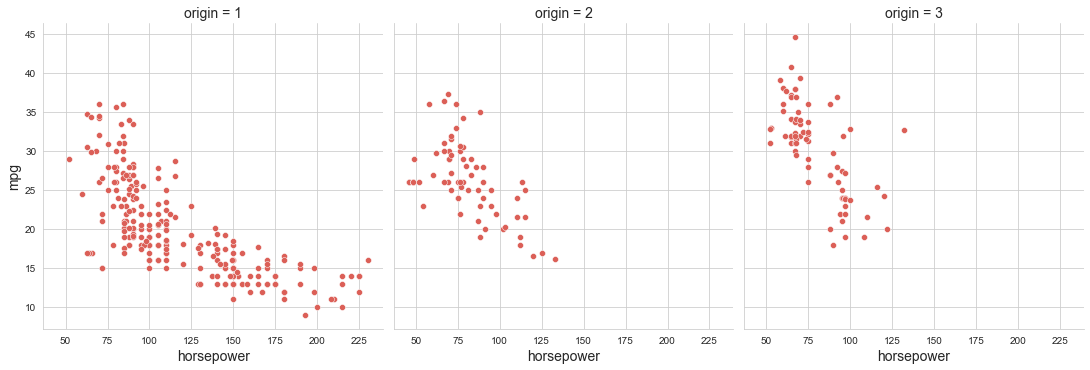

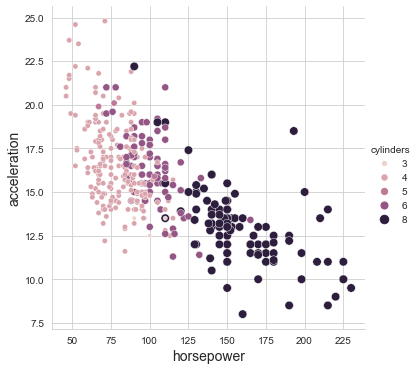

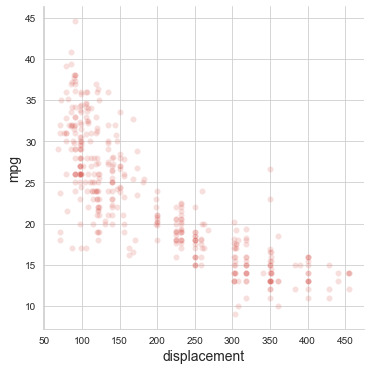

In [241]:
sns.relplot(data=df, kind="scatter", x = "weight", y="displacement")

sns.relplot(data=df,kind="scatter",x="horsepower",y="mpg",col="origin")
sns.relplot(data=df,kind="scatter",x="horsepower",y="acceleration",hue="cylinders",size="cylinders")

sns.relplot(data=df,kind="scatter",x="displacement",y="mpg",alpha = 0.2)


plt.show();

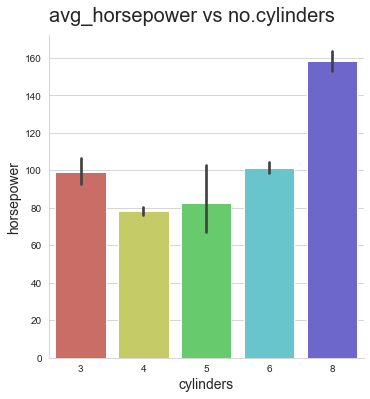

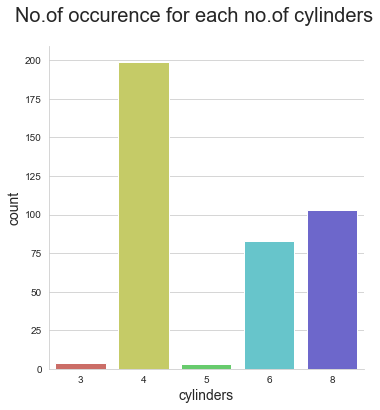

In [242]:
g = sns.catplot(x="cylinders",y="horsepower",data=df,kind="bar")
#in general , the cylinders is directly related to increasing the horsepower but origin 3 is odd
g.fig.suptitle("avg_horsepower vs no.cylinders ",y=1.05,size =20)
#g.set_titles("origin_1","origin_2","origin_3",size=12)


w= sns.catplot(data=df,x="cylinders",kind="count")
w.fig.suptitle("No.of occurence for each no.of cylinders",y=1.08,size=20)

plt.show();

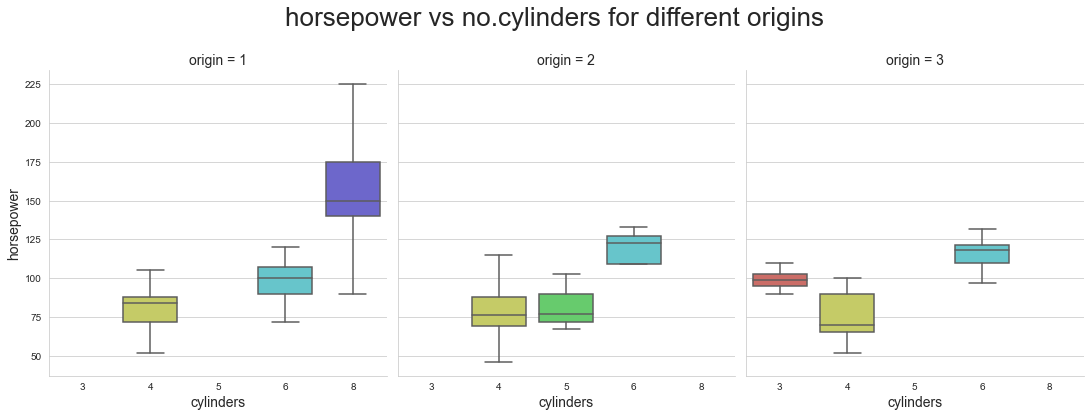

In [243]:
w= sns.catplot(x="cylinders",y="horsepower",data=df,kind="box",col="origin",sym = "")
w.fig.suptitle("horsepower vs no.cylinders for different origins" , y=1.1 , size=26)
w.set_titles(size = 14)
plt.show();


# <center>**2nd** Insights:
  
<center> 1. Cars of origin 3 and 2 are often of low power <br><br>
<center>2. I expected direct proportional relation between acceleration & horsepower so another feature must be introduced in the data.<br><br>
<center>3. After many plots, I found: <br>  <center>
`mpg`   ∝  `acceleration`   ∝   1/`horsepower`   ∝   1/`displacement`   ∝    1/`weight` <br><br>
    
<center> 4. An increase in horsepower is direclty related to increaese in no.of_cylinders`... neglecting 3-cylindered cars as they rarely exist.<br><br>

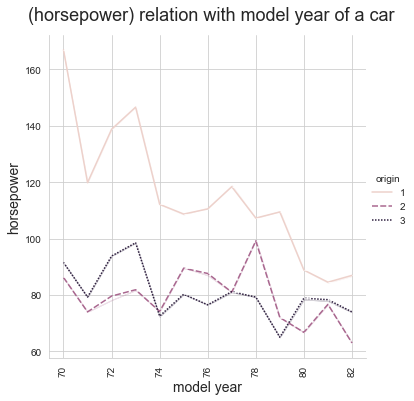

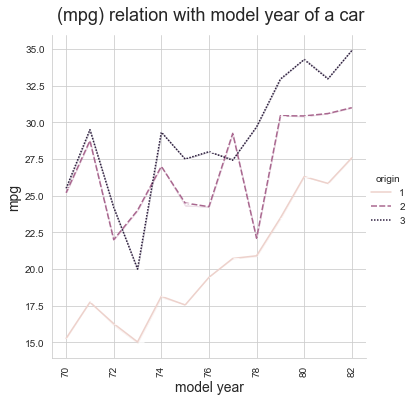

In [244]:

m =sns.relplot(x="model year",y="horsepower",data=df,kind="line",style="origin",hue="origin",marker=True,ci=False)
plt.xticks(rotation=90)


n = sns.relplot(x="model year",y="mpg",data=df,kind="line",style="origin",hue="origin",marker=True,ci=False)
plt.xticks(rotation=90)


m.fig.suptitle("(horsepower) relation with model year of a car",size = 18, y=1.05)
n.fig.suptitle("(mpg) relation with model year of a car",size = 18, y=1.05)


plt.show()

# <center>**3rd** Insight:
  
<center> 1. As a car gets upgraded (its model year increases) , its horsepower decreases and its mpg increases so:<br><br>
 <center> engine efficiency increases with increasing model year.